# R-file level analysis

This notebook analyzes R files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [69]:
df = pd.read_csv("data/one-hour-run-data/rfile_stats.csv", delimiter='\t', \
                 names=['doi', 'filename', 'comments_no', 'dep_no', 'func_no', \
                        'test_no', 'class_no','encoding', 'total_lines'])

# Items[*].[doi.S,filename.S,comments_no.S,dep_no.S,func_no.S,test_no.S,class_no.S,encoding.S,total_lines.S]

In [70]:
len(df)

8178

In [71]:
df.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines
0,doi:10.7910/DVN/XFQZI2,Condemnation.R,71,10,1,0,0,ascii,335
1,doi:10.7910/DVN/WGPDBS,Replication_of_Figures.R,17,1,0,0,0,ascii,238
2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,13,4,0,2,0,Windows-1252,188
3,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,8,4,0,2,0,Windows-1252,153
4,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,4,3,0,0,0,Windows-1252,37


# Convert to numbers ...

In [72]:
def column_to_int(el):
    el = el.strip()
    
    if el.isdigit():
        return float(el.split()[0])
    else:
        print(el)  
        return np.nan
    
df['total_lines']=df["total_lines"].apply(column_to_int)

simple slopes
13 state south.R
OA3
2 and 3.R


In [73]:
df['comments_no']=df["comments_no"].apply(column_to_int)

and main effects.R
OA4
4 (Point Estimates).R


In [74]:
df['dep_no']=df["dep_no"].apply(column_to_int)

OA5


In [75]:
df['func_no']=df["func_no"].apply(column_to_int)

OA6


In [76]:
df['test_no']=df["test_no"].apply(column_to_int)

OA8.R


# Relative no of comments

In [77]:
# ( total lines - no of comments ) / no of comments
df['comm_rel']=(df['total_lines']-df['comments_no'])/df['comments_no']
df['comm_rel']=df['comm_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

In [78]:
df["total_lines"].mean()

312.94237827257155

In [79]:
df["total_lines"].median()

160.0

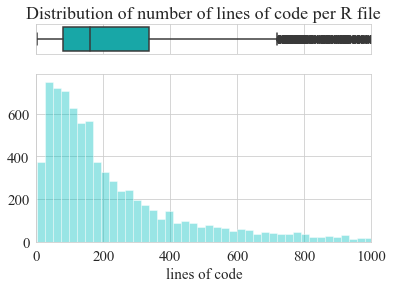

In [80]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["total_lines"], color='c', ax=ax_box)
sns.distplot(df["total_lines"].dropna(), color='c', ax=ax_hist, kde=False, bins=700)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Distribution of number of lines of code per R file')
ax_hist.set(xlabel="lines of code")
#plt.xscale('log')
plt.xlim(0, 1000)
plt.show()

f.tight_layout()
f.savefig("plots/line_of_code.png", dpi=100)

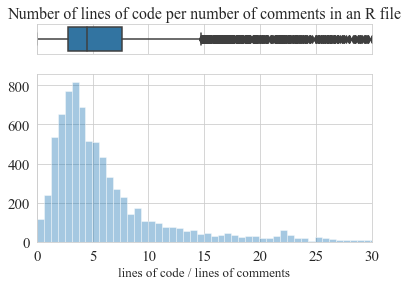

In [81]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["comm_rel"], ax=ax_box)
sns.distplot(df["comm_rel"].dropna(), ax=ax_hist, kde=False, bins=350)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Number of lines of code per number of comments in an R file', fontsize=16)
ax_hist.set_xlabel("lines of code / lines of comments", fontsize=13)
#plt.xscale('log')
plt.xlim(0, 30)
plt.show()

f.tight_layout()
f.savefig("plots/rel_comments.png", dpi=100)

In [82]:
df["comm_rel"].median()

4.5

In [83]:
df["comm_rel"].mean()

7.368942052771114

# Relative no of dependencies

In [84]:
# ( total lines - no of comments ) / no of comments
df['dep_rel']=(df['total_lines']-df['dep_no'])/df['dep_no']
df['dep_rel']=df['dep_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

In [128]:
df['dep_rel'].median()

50.6

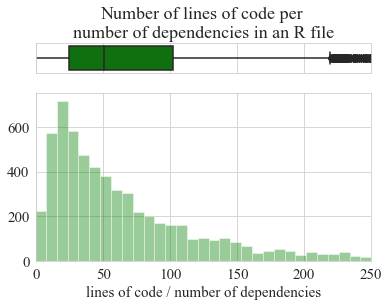

In [110]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["dep_rel"], color='g', ax=ax_box)
sns.distplot(df["dep_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=800)
 
# Remove x axis name for the boxplot"
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per \nnumber of dependencies in an R file')
ax_hist.set(xlabel="lines of code / number of dependencies")
#plt.xscale('log')
plt.xlim(0, 250)
plt.show()

f.tight_layout()
f.savefig("plots/rel_dep.png", dpi=100)

## exclude where 0 dependencies

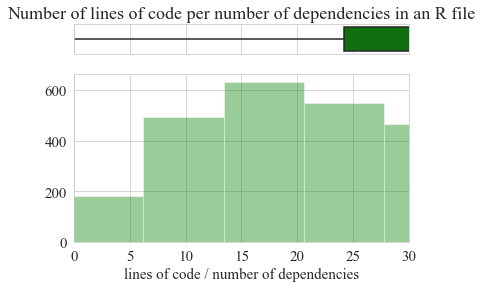

In [86]:
rslt_df = df[df['dep_rel'] != 0] 

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(rslt_df["dep_rel"], color='g', ax=ax_box)
sns.distplot(rslt_df["dep_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=900)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per number of dependencies in an R file')
ax_hist.set(xlabel="lines of code / number of dependencies")
#plt.xscale('log')
plt.xlim(0, 30)
plt.show()


# Relative no of either func or class

In [15]:
df['module']=df['func_no']+df['class_no']

# Contain functions

In [51]:
(df['func_no'] != 0).sum()

2851

# Contain classes

In [52]:
(df['class_no'] != 0).sum()

373

In [16]:
# ( total lines - no of comments ) / no of comments
df['module_rel']=df['total_lines']/df['module']
df['module_rel']=df['module_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

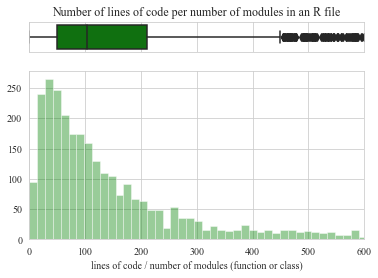

In [17]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["module_rel"], color='g', ax=ax_box)
sns.distplot(df["module_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=700)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per number of modules in an R file')
ax_hist.set(xlabel="lines of code / number of modules (function or class)")
#plt.xscale('log')
plt.xlim(0, 600)
#plt.ylim(0, 600)
plt.show()

f.tight_layout()
f.savefig("plots/rel_module.png", dpi=100)

## Average in code that have modules

In [54]:
rslt_df = df[df['module_rel'] > 0]
rslt_df['module_rel'].median()

103.0

In [53]:
df['module_rel'].median()

103.0

# Relative no of funcs

In [160]:
df2 = df.loc[df['func_no'] != 0].copy()
len(df2)

2851

In [139]:
df3 = pd.read_csv("data/one-hour-run-data/readability_metrics.csv", delimiter='\t', \
                 names=['doi', 'filename', 'line_no', 'avg_line_len', 'max_line_len', \
                        'avg_indentation', 'max_indentation', 'avg_numbers', 'avg_comments', \
                        'max_numbers', 'avg_periods', 'avg_commas', 'avg_spaces', \
                        'avg_parentheses', 'avg_arithmetic_operators', 'avg_comparison_operators', \
                        'avg_assignments', 'avg_branches', 'avg_loops', 'avg_keywords', \
                        'max_keywords', 'avg_blank_lines', 'max_occurrence_of_character', \
                        'avg_vars_len', 'max_vars_len', 'avg_vars_count', 'max_vars_count', \
                        'max_occurence_of_var', 'vars'])

In [142]:
len(df3)

4124

In [153]:
df3.head()

,doi,filename,line_no,avg_line_len,max_line_len,avg_indentation,max_indentation,avg_numbers,avg_comments,max_numbers,...,avg_keywords,max_keywords,avg_blank_lines,max_occurrence_of_character,avg_vars_len,max_vars_len,avg_vars_count,max_vars_count,max_occurence_of_var,vars
0,doi:10.7910/DVN/WGPDBS,Replication_of_Figures.R,239,38.673640,189,2.297071,41,5.556485,0.071130,21,...,0.292887,4,0.217573,43,12.77551,19,1.058577,8,60,close_lo;soph_lo;sophsq;pid_lo;general_means;x...
1,doi:10.7910/DVN/WCTILJ,Script.R,83,34.891566,170,0.072289,2,2.445783,0.253012,19,...,0.349398,4,0.156627,17,0.00000,0,8.614458,42,715,NaN
2,doi:10.7910/DVN/O3ETO9,jose-galdino-script-tf-ad-ufpe-2018.R,106,26.698113,182,1.886792,40,0.509434,0.160377,9,...,0.179245,1,0.339623,48,0.00000,0,9.537736,69,1011,NaN
3,doi:10.7910/DVN/TKTN5J,0_Run It All.R,78,28.179487,68,0.512821,10,0.576923,0.320513,8,...,0.333333,2,0.230769,57,0.00000,0,8.538462,58,666,NaN
4,doi:10.7910/DVN/TKTN5J,1_Prep the data.R,103,37.378641,88,2.145631,33,1.058252,0.223301,9,...,0.378641,3,0.135922,57,3.00000,8,0.291262,2,18,division;dt;r;R


In [147]:
df2 = df2.merge(df3, on=['doi','filename'])

In [151]:
df2.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines,comm_rel,...,avg_keywords_y,max_keywords_y,avg_blank_lines_y,max_occurrence_of_character_y,avg_vars_len_y,max_vars_len_y,avg_vars_count_y,max_vars_count_y,max_occurence_of_var_y,vars_y
0,doi:10.7910/DVN/TKTN5J,AP - Multigrid.R,19.0,1.0,1.0,0.0,0,ascii,48.0,1.53,...,0.645833,4,0.187500,40,4.200000,9,0.187500,2,8,division;dt;r;R;multiplot
1,doi:10.7910/DVN/TKTN5J,x_Auxiliary Functions.R,28.0,1.0,3.0,0.0,0,utf-8,112.0,3.00,...,0.495575,4,0.159292,57,7.142857,15,0.389381,2,32,division;format_raw_data;rearrange_data;multip...
2,doi:10.7910/DVN/KKS1R0,data_bayes_out.R,24.0,0.0,4.0,0.0,0,ascii,77.0,2.21,...,0.410256,4,0.205128,88,7.500000,15,0.410256,3,14,division;lowerbound;upperbound;dat.a.bayes.out...
3,doi:10.7910/DVN/KKS1R0,ep_jags_functions.R,33.0,1.0,3.0,0.0,0,ISO-8859-1,115.0,2.48,...,0.474138,5,0.198276,70,9.500000,17,0.275862,4,27,division;lowerbound;ep.wf.negbin.b;upperbound;...
4,doi:10.7910/DVN/KKS1R0,prepare_data_set.R,26.0,0.0,1.0,0.0,0,ISO-8859-1,71.0,1.73,...,0.347222,3,0.083333,70,9.117647,17,0.486111,3,19,division;lowerbound;oxyellow;ep.wf.negbin.b;ox...


In [155]:
df2['blan_no'] = df2['avg_blank_lines_y'] * df2['total_lines']

In [144]:
temp.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines,comm_rel,...,avg_keywords,max_keywords,avg_blank_lines,max_occurrence_of_character,avg_vars_len,max_vars_len,avg_vars_count,max_vars_count,max_occurence_of_var,vars
0,doi:10.7910/DVN/TKTN5J,AP - Multigrid.R,19.0,1.0,1.0,0.0,0,ascii,48.0,1.53,...,0.645833,4,0.187500,40,4.200000,9,0.187500,2,8,division;dt;r;R;multiplot
1,doi:10.7910/DVN/TKTN5J,x_Auxiliary Functions.R,28.0,1.0,3.0,0.0,0,utf-8,112.0,3.00,...,0.495575,4,0.159292,57,7.142857,15,0.389381,2,32,division;format_raw_data;rearrange_data;multip...
2,doi:10.7910/DVN/KKS1R0,data_bayes_out.R,24.0,0.0,4.0,0.0,0,ascii,77.0,2.21,...,0.410256,4,0.205128,88,7.500000,15,0.410256,3,14,division;lowerbound;upperbound;dat.a.bayes.out...
3,doi:10.7910/DVN/KKS1R0,ep_jags_functions.R,33.0,1.0,3.0,0.0,0,ISO-8859-1,115.0,2.48,...,0.474138,5,0.198276,70,9.500000,17,0.275862,4,27,division;lowerbound;ep.wf.negbin.b;upperbound;...
4,doi:10.7910/DVN/KKS1R0,prepare_data_set.R,26.0,0.0,1.0,0.0,0,ISO-8859-1,71.0,1.73,...,0.347222,3,0.083333,70,9.117647,17,0.486111,3,19,division;lowerbound;oxyellow;ep.wf.negbin.b;ox...


In [161]:
df2['func_rel']=(df2['total_lines']- df2['func_no'] - df2['dep_no'] - df2['comments_no'])/df2['func_no']

In [162]:
df2['func_rel']=df2['func_rel'].round(2)
#df2=df2.replace([np.inf, -np.inf], np.nan)
df2.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines,comm_rel,dep_rel,func_rel
0,doi:10.7910/DVN/XFQZI2,Condemnation.R,71.0,10.0,1.0,0.0,0,ascii,335.0,3.72,32.50,253.0
21,doi:10.7910/DVN/BPON3K,tab_2_balance_test_before_court_decision.R,8.0,4.0,1.0,0.0,0,ascii,168.0,20.00,41.00,155.0
22,doi:10.7910/DVN/BPON3K,tab_3_balance_test_after_court_decision.R,7.0,4.0,1.0,0.0,0,ascii,161.0,22.00,39.25,149.0
31,doi:10.7910/DVN/ZWAGXZ,experiment 1 analysis REPLICATION.R,32.0,4.0,1.0,25.0,0,ascii,372.0,10.62,92.00,335.0
32,doi:10.7910/DVN/ZWAGXZ,experiment 2 analysis REPLICATION.R,49.0,8.0,1.0,7.0,0,ascii,849.0,16.33,105.12,791.0


In [163]:
df2.func_rel.median()

82.41499999999999

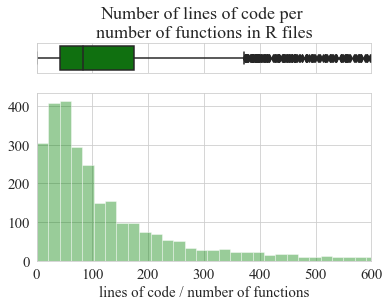

In [164]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df2["func_rel"], color='g', ax=ax_box)
g = sns.distplot(df2["func_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=450)
#g.set_yscale("log")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per \nnumber of functions in R files')
ax_hist.set(xlabel="lines of code / number of functions")
#plt.xscale('log')
plt.xlim(0, 600)
#plt.ylim(0, 1000)
plt.show()

f.tight_layout()
f.savefig("plots/func_rel.png", dpi=100)

# Relative no of class

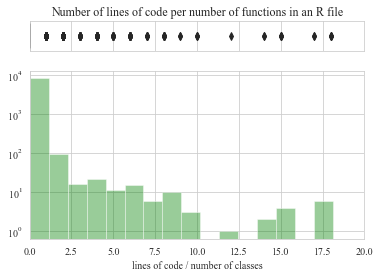

In [21]:
rslt_df = df #[df['class_no'] != 0] 

# ( total lines - no of comments ) / no of comments
rslt_df['class_rel']=(rslt_df['total_lines']-rslt_df['class_no'])/rslt_df['class_no']
rslt_df['class_rel']=rslt_df['class_no'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(rslt_df["class_rel"], color='g', ax=ax_box)
sns.distplot(rslt_df["class_rel"].dropna(), color='g', ax=ax_hist, kde=False, bins=150)
#g.set_yscale("log")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Number of lines of code per number of functions in an R file')
ax_hist.set(xlabel="lines of code / number of classes")
plt.yscale('log')
plt.xlim(0, 20)
plt.show()

f.tight_layout()
f.savefig("plots/class_rel.png", dpi=100)

# Relative no of tests

In [114]:
df.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines,comm_rel,dep_rel
0,doi:10.7910/DVN/XFQZI2,Condemnation.R,71.0,10.0,1.0,0.0,0,ascii,335.0,3.72,32.50
1,doi:10.7910/DVN/WGPDBS,Replication_of_Figures.R,17.0,1.0,0.0,0.0,0,ascii,238.0,13.00,237.00
2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,13.0,4.0,0.0,2.0,0,Windows-1252,188.0,13.46,46.00
3,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,8.0,4.0,0.0,2.0,0,Windows-1252,153.0,18.12,37.25
4,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,4.0,3.0,0.0,0.0,0,Windows-1252,37.0,8.25,11.33


In [115]:
(df['test_no'] != 0).sum()

2262

In [116]:
df2 = df.loc[df['test_no'] != 0].copy()
len(df2)

2262

In [117]:
df2['test_rel']=df2['total_lines']/df2['test_no']
df2['test_rel']=df2['test_rel'].round(2)
#df2=df2.replace([np.inf, -np.inf], np.nan)
df2.head()

,doi,filename,comments_no,dep_no,func_no,test_no,class_no,encoding,total_lines,comm_rel,dep_rel,test_rel
2,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,13.0,4.0,0.0,2.0,0,Windows-1252,188.0,13.46,46.00,94.0
3,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,8.0,4.0,0.0,2.0,0,Windows-1252,153.0,18.12,37.25,76.5
7,doi:10.7910/DVN/BPON3K,fig_2_fig_4_party_switching.R,34.0,4.0,0.0,4.0,0,ascii,302.0,7.88,74.50,75.5
8,doi:10.7910/DVN/BPON3K,fig_3_effect_of_winning_on_federal_congress.R,6.0,4.0,0.0,2.0,0,Windows-1252,156.0,25.00,38.00,78.0
9,doi:10.7910/DVN/BPON3K,fig_5_tab_7_rd_robust_estimations.R,6.0,6.0,0.0,2.0,0,ascii,107.0,16.83,16.83,53.5


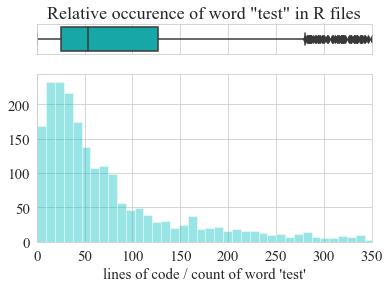

In [121]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df2["test_rel"], color='c', ax=ax_box)
g = sns.distplot(df2["test_rel"].dropna(), color='c', ax=ax_hist, kde=False, bins=350)
#g.set_yscale("log")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(title='Relative occurence of word "test" in R files')
ax_hist.set(xlabel="lines of code / count of word 'test'")
#plt.xscale('log')
plt.xlim(0, 350)
#plt.ylim(0, 1000)
plt.show()

f.tight_layout()
f.savefig("plots/test_rel.png", dpi=100)

In [124]:
df2['test_no'].median()

4.0

In [126]:
df2['test_rel'].median()

53.5

# Encoding

In [22]:
temo = df.encoding.value_counts().reset_index().head(4)

In [23]:
labels = temo['index']
labels = labels.append(pd.Series('other'))

In [24]:
sizes = temo['encoding']
sizes = sizes.append(pd.Series(64))

In [25]:
labels

0           ascii
1           utf-8
2      ISO-8859-1
3    Windows-1252
0           other
dtype: object

/Users/anatrisovic/Desktop/aws-dataverse/env/lib/python2.7/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


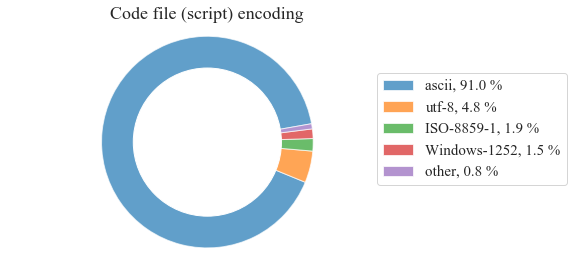

In [26]:
# Pie chart
#labels = ['Yes',  'No']
#sizes = [(df['docs'] == 1).sum(), (df['docs'] == 0).sum()]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
pie = ax1.pie(sizes,   startangle=10, \
        textprops={'fontsize': 12},wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Code file (script) encoding", size=18)
plt.tight_layout()

#ax2 = fig.add_subplot(212)
#ax2.axis("off") 
#ax2.legend(pie[0],labels, loc="center")
total = sizes.sum()
plt.legend(
    pie[0],labels=['%s, %1.1f %%' % (l, s*100.0/total) for l, s in zip(labels, sizes)], \
    bbox_to_anchor=(1.35,0.3), loc="lower right", \
    bbox_transform=plt.gcf().transFigure)

plt.show()
fig.savefig("plots/encoding.png", bbox_inches="tight")